
# [The Iris Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

The data set consists of $n=150$ samples from each of three species of Iris ([Iris setosa](https://en.wikipedia.org/wiki/Iris_setosa), [Iris virginica](https://en.wikipedia.org/wiki/Iris_virginica) and [Iris versicolor](https://en.wikipedia.org/wiki/Iris_versicolor),  $50$ samples from each of these three species). Four <a href="Feature_(machine_learning)">features</a>, i.e. $p=4$, were measured from each sample: the length and the width of the [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal), in centimetres. 
The petal and sepal length data $X \in \mathbb{R}^{n \times p}$, where $n=150$ and $p=4$
are stored in a $150\times4$ `numpy.ndarray`

The rows being the samples and the columns being:
Sepal Length, Sepal Width, Petal Length	and Petal Width.

![Iris Pictures](./iris-machinelearning.png)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data ;  y = iris.target

### Plot the first two features

<Figure size 576x432 with 0 Axes>

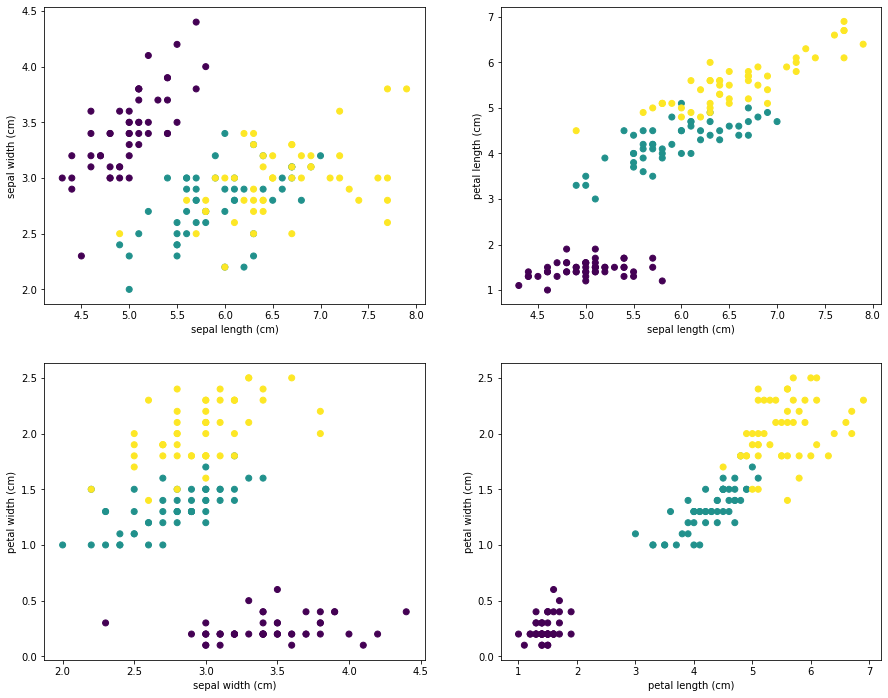

In [7]:
plt.figure(figsize=(8,6))
f,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15, 12))
# Axe 1 and 2
ax1.scatter(X[:,0], X[:,1],c=iris.target,)
ax1.set_xlabel(iris.feature_names[0])
ax1.set_ylabel(iris.feature_names[1])

# Axe 1 and 3
ax2.scatter(X[:,0], X[:,2],c=iris.target,)
ax2.set_xlabel(iris.feature_names[0])
ax2.set_ylabel(iris.feature_names[2])

# Axe 2 and 4
ax3.scatter(X[:,1], X[:,3],c=iris.target,)
ax3.set_xlabel(iris.feature_names[1])
ax3.set_ylabel(iris.feature_names[3])

# Axe 3 and 4
cf= ax4.scatter(X[:,2], X[:,3],c=iris.target,)
ax4.set_xlabel(iris.feature_names[2])
ax4.set_ylabel(iris.feature_names[3])
#f.colorbar(cf, ax=ax4)
plt.show()

### Plot the first three PCA dimensions  
To get a better visualization and understanding of interaction of the dimensions

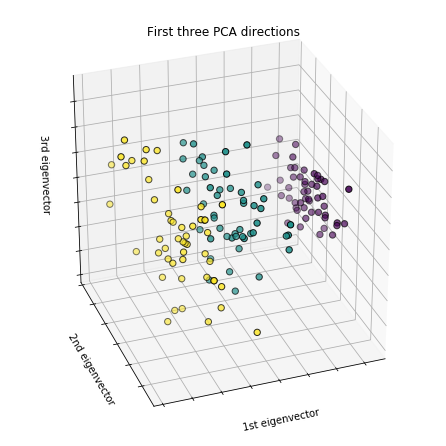

In [9]:
fig = plt.figure(2, figsize=(6, 6))
plt.clf()
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

### plot now the first two PCA dimensions

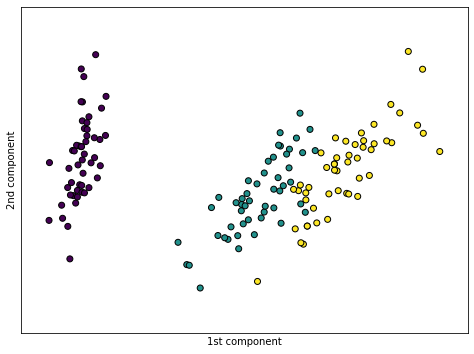

In [10]:
#X_reduced2D = PCA(n_components=2).fit_transform(iris.data)
X_reduced2D = X_reduced[:,0:2]
x_min, x_max = X_reduced2D[:, 0].min() - .5, X_reduced2D[:, 0].max() + .5
y_min, y_max = X_reduced2D[:, 1].min() - .5, X_reduced2D[:, 1].max() + .5 

plt.figure(3, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced2D[:, 0], X_reduced2D[:, 1], c=y, edgecolor='k')
plt.xlabel('1st component')
plt.ylabel('2nd component')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Plot loading vectors and score

In [11]:
iris_pca= PCA().fit(X)
iris_pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

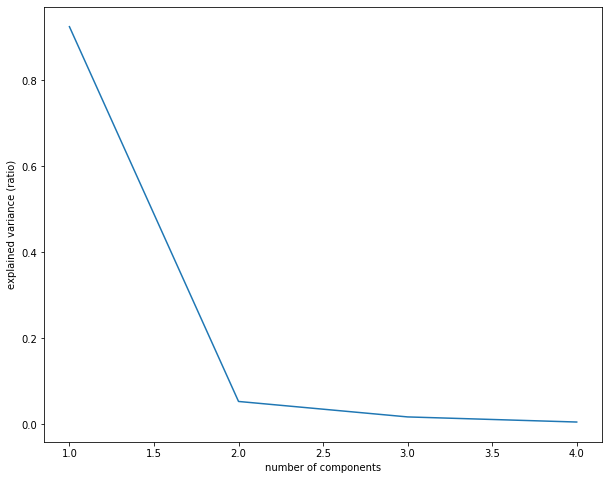

In [12]:
plt.figure(4, figsize=(10, 8))
plt.clf()
plt.plot(range(1,5),iris_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance (ratio)')
plt.show()

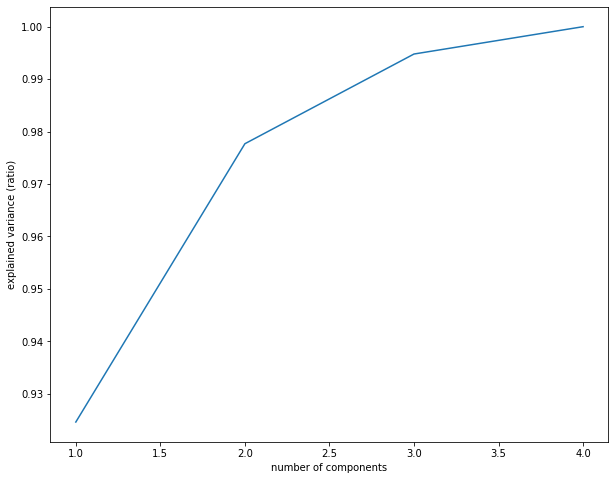

In [15]:
import numpy as np
plt.figure(4, figsize=(10, 8))
plt.clf()
plt.plot(range(1,5),np.cumsum(iris_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance (ratio)')
plt.show()